#Comparing the Performance of Various Machine Learning Models for Stock Price Prediction


# **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVR
import seaborn as sns

# **Load Data into the Data Frame**

In [2]:
# input
symbol = 'TSLA'
start = '2010-01-01'
end = '2021-12-31'

dataset = pd.read_csv('../dataset/TSLA.csv')
dataset.sample(5)
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


# **Data Preprocessing**

In [3]:
dataset['Increase_Decrease'] = np.where(dataset['Volume'].shift(-1) > dataset['Volume'],1,0)
dataset['Buy_Sell_on_Open'] = np.where(dataset['Open'].shift(-1) > dataset['Open'],1,0)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,0)
dataset['Returns'] = dataset['Adj Close'].pct_change()
dataset = dataset.dropna()
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,0,0,0,-0.002511
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,0,0,0,-0.078473
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,1,0,0,-0.125683
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,1,0,0,-0.160937
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,1,0,1,-0.019243


In [4]:
#View Dataset
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,0,0,0,-0.002511
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,0,0,0,-0.078473
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,1,0,0,-0.125683
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,1,0,0,-0.160937
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700,1,0,1,-0.019243
...,...,...,...,...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1,1,1,0.015913
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,1,1,1,0.024854
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,0,1,1,0.102962
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,1,1,1,0.015231


# **Dataset Cleaning and Null Value Testing**

In [5]:
# See how many null values in each column
dataset.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
Volume               0
Increase_Decrease    0
Buy_Sell_on_Open     0
Buy_Sell             0
Returns              0
dtype: int64

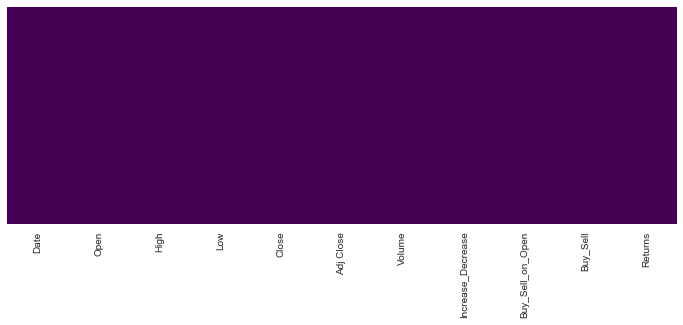

In [6]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [7]:
# see number of rows, number of columns
dataset.shape

(2415, 11)

In [8]:
#TOTAL NUMBER OF RECORDS
dataset.size
print("Total number of records = ",dataset.size)

Total number of records =  26565


In [9]:
# see columns names

dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Increase_Decrease', 'Buy_Sell_on_Open', 'Buy_Sell', 'Returns'],
      dtype='object')

In [10]:
#View Data Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2415 entries, 1 to 2415
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               2415 non-null   object 
 1   Open               2415 non-null   float64
 2   High               2415 non-null   float64
 3   Low                2415 non-null   float64
 4   Close              2415 non-null   float64
 5   Adj Close          2415 non-null   float64
 6   Volume             2415 non-null   int64  
 7   Increase_Decrease  2415 non-null   int32  
 8   Buy_Sell_on_Open   2415 non-null   int32  
 9   Buy_Sell           2415 non-null   int32  
 10  Returns            2415 non-null   float64
dtypes: float64(6), int32(3), int64(1), object(1)
memory usage: 198.1+ KB


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>,
        <AxesSubplot:title={'center':'Low'}>],
       [<AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>],
       [<AxesSubplot:title={'center':'Increase_Decrease'}>,
        <AxesSubplot:title={'center':'Buy_Sell_on_Open'}>,
        <AxesSubplot:title={'center':'Buy_Sell'}>],
       [<AxesSubplot:title={'center':'Returns'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

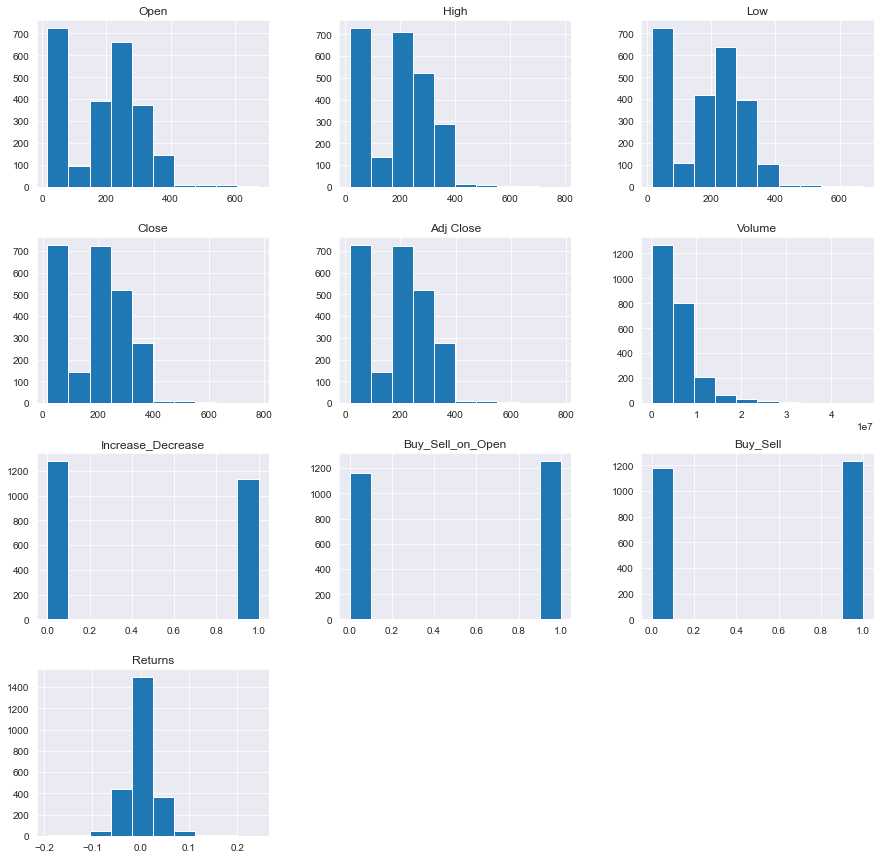

In [11]:
# Histogram per each numerical column

dataset.hist(figsize=(15, 15))

In [12]:
# The statistics per each column

dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,Increase_Decrease,Buy_Sell_on_Open,Buy_Sell,Returns
count,2415.000000,2415.000000,2415.000000,2415.000000,2415.000000,2.415000e+03,2415.000000,2415.000000,2415.000000,2415.000000
mean,186.340410,189.646373,182.985118,186.470944,186.470944,5.567259e+06,0.469979,0.520497,0.511387,0.001975
std,118.715928,120.870941,116.833297,119.114759,119.114759,4.981607e+06,0.499201,0.499683,0.499974,0.032762
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,0.000000,0.000000,0.000000,-0.193274
25%,34.375000,34.930001,33.650000,34.400002,34.400002,1.897250e+06,0.000000,0.000000,0.000000,-0.014178
50%,213.100006,216.750000,208.919998,212.960007,212.960007,4.577200e+06,0.000000,1.000000,1.000000,0.000870
75%,266.450012,270.935012,262.104995,266.779999,266.779999,7.360250e+06,1.000000,1.000000,1.000000,0.018115
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,1.000000,1.000000,1.000000,0.243951


# **Define X and Y**

In [13]:
X = dataset['Open'].values.reshape(-1,1)
y = dataset['Adj Close'].values.reshape(-1,1)

In [14]:
# Split Train Data and Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [15]:
# Model Training
model = SVR()
model.fit(X_train, y_train)

SVR()

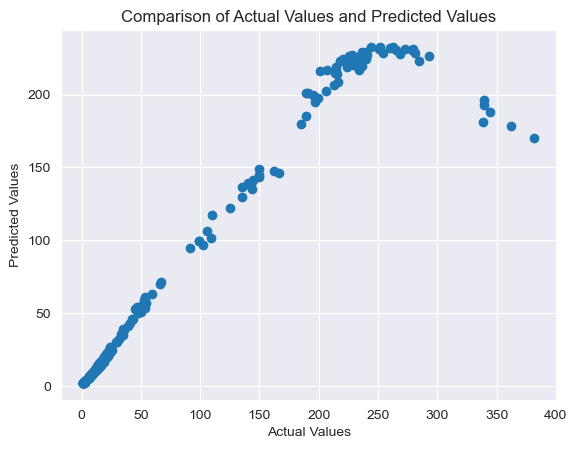

In [16]:
# Comparison of Actual Values and Predicted Values
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Actual Values and Predicted Values')
plt.show()

In [17]:
df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
print(df.head())
print(df.tail())

      Actual  Predicted
0  14.712000  14.727236
1  16.504667  15.335608
2   1.463333   2.514801
3  16.004000  15.613330
4   1.838000   2.828161
         Actual   Predicted
575   12.311333   11.810751
576   13.939333   13.906032
577    1.580667    2.660781
578  281.516663  228.571822
579   16.599333   16.225352


In [18]:
# Accuracy and Loss Function Values of the Model
from sklearn import metrics
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Accuracy Score:', model.score(X_test, y_test))

Mean Absolute Error (MAE): 3.916464710907885
Mean Squared Error (MSE): 340.6996836507791
Root Mean Squared Error (RMSE): 18.458052000435448
Accuracy Score: 0.9369082949256313
